In [1]:
from __future__ import division

from IPython.core.display import Image

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

PATH = './assets/images/'

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Feature Extraction from Text + NLP
Week 7| Lesson 1.2

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Extract features from free-form text using Scikit Learn
- Identify Parts of Speech using NLTK
- Remove stop words
- Describe how TFIDF works

### LESSON GUIDE

* Working with Text
* Scikit-Learn Count Vectorizer 
* Scikit-Learn Hashing Vectorizer
* Intro to Natural Language Processing
* Advanced NLP with NLTK
* Term frequency - Inverse document Frequency

## Working with Text

So far nearly all our data has looked like this...<br><br>
$$ 
X = 
\begin{bmatrix}
    feature_1 & feature_2 & feature_3 & feature_4 \\
    0.1 & 1.5 & 6 & 1.1 \\
    2.1 & 5.7 & 33 & 9.2 \\
    0.1 & 2.1 & 41 & 3.1 \\
\end{bmatrix}
$$

## But what if our data looked like this?

<small><center>I said a hip hop,<br>
The hippie, the hippie,<br>
To the hip, hip hop, and you don't stop, a rock it<br>
To the bang bang boogie, say, up jump the boogie,<br>
To the rhythm of the boogie, the beat.<br>
Now, what you hear is not a test - I'm rappin' to the beat,<br>
And me, the groove, and my friends are gonna try to move your feet.<br>
See, I am Wonder Mike, and I'd like to say hello,<br>
To the black, to the white, the red and the brown,<br>
The purple and yellow. But first, I gotta<br>
Bang bang, the boogie to the boogie,<br>
Say up jump the boogie to the bang bang boogie,<br>
Let's rock, you don't stop,<br>
Rock the rhythm that'll make your body rock.<br>
Well so far you've heard my voice but I brought two friends along,<br>
And the next on the mic is my man Hank,
C'mon, Hank, sing that song!</center></small>

## That is the focus of Natural Language Processing (NLP)

## Question: What are some real-world applications of working with language-based data (text or spoken)?

- Speech Recognition [Siri]
- Machine Translation [Google Translate]
- Question Answering [Echo]
- Topic Clustering [Google News]
- Sentiment Analysis [Social Mention ]

<small><center>I said a hip hop,<br>
The hippie, the hippie,<br>
To the hip, hip hop, and you don't stop, a rock it<br>
To the bang bang boogie, say, up jump the boogie,<br>
To the rhythm of the boogie, the beat.<br>
Now, what you hear is not a test - I'm rappin' to the beat,<br>
And me, the groove, and my friends are gonna try to move your feet.<br>
See, I am Wonder Mike, and I'd like to say hello,<br>
To the black, to the white, the red and the brown,<br>
The purple and yellow. But first, I gotta<br>
Bang bang, the boogie to the boogie,<br>
Say up jump the boogie to the bang bang boogie,<br>
Let's rock, you don't stop,<br>
Rock the rhythm that'll make your body rock.<br>
Well so far you've heard my voice but I brought two friends along,<br>
And the next on the mic is my man Hank,
C'mon, Hank, sing that song!</center></small>

$$ 
X = 
\begin{bmatrix}
    feature_1 & feature_2 & feature_3 & feature_4 \\
    0.1 & 1.5 & 6 & 1.1 \\
    2.1 & 5.7 & 33 & 9.2 \\
    0.1 & 2.1 & 41 & 3.1 \\
\end{bmatrix}
$$

##  But, remember sometimes we had something that looked like this...

$$ 
X = 
\begin{bmatrix}
    feature_1 & feature_2 & feature_3 & feature_4 \\
    0.1 & 1.5 & 6 & red \\
    2.1 & 5.7 & 33 & blue \\
    0.1 & 2.1 & 41 & green \\
\end{bmatrix}
$$

## So what did we do?

```python
pd.get_dummies()
```

In [2]:
data = {'f1': [0.1, 2.1, 0.1], 'f2': [1.5, 5.7, 2.1], 'f3': [6, 33, 41], 'f4': ['red', 'blue', 'green']}

df = pd.DataFrame(data)
df

,f1,f2,f3,f4
0,0.1,1.5,6,red
1,2.1,5.7,33,blue
2,0.1,2.1,41,green


In [3]:
color_dummies = pd.get_dummies(df['f4']).astype('int')
cdf = pd.concat([df.iloc[:,:-1], color_dummies], axis=1)
cdf

,f1,f2,f3,blue,green,red
0,0.1,1.5,6,0,0,1
1,2.1,5.7,33,1,0,0
2,0.1,2.1,41,0,1,0


## With that coding scheme, we could check for the presence or absence of some feature

## But is that it? Is that Enough to Build a Siri or an Echo? 

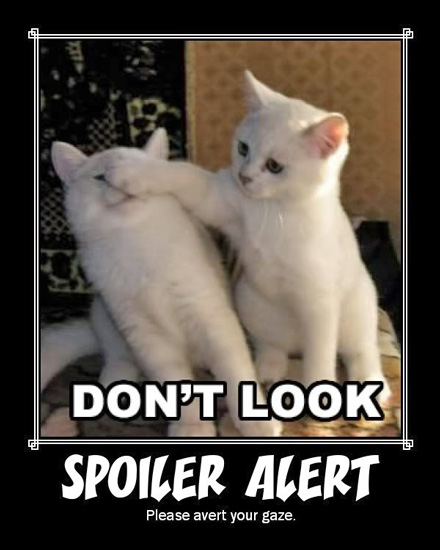

In [4]:
Image(PATH + 'spoiler.jpg')

# No.

## What might be missing?

## To start, what we need to answer:

- How do we get the words into the columns?
- How do we deal with the same word multiple times?
- What about word order?
- What do we do with punctuation?
- Should we only use some words?
- Do we count every word equally?

## All of this and more will be revealed...

## Feature Extraction from Text

### A simple example

Suppose we are building a spam/ham classifier. 
Our input is an email corpus, our expected output is a binary classification.

In [39]:
spam = """
Hello,\nI saw your contact information on LinkedIn. I have carefully read through your profile and you seem to have an outstanding personality. This is one major reason why I am in contact with you. My name is Mr. Valery Grayfer Chairman of the Board of Directors of PJSC "LUKOIL". I am 86 years old and I was diagnosed with cancer 2 years ago. I will be going in for an operation later this week. I decided to WILL/Donate the sum of 8,750,000.00 Euros(Eight Million Seven Hundred And Fifty Thousand Euros Only etc. etc.
"""

ham = """
Hello,\nI am writing years in regards to your application to the position of Data Scientist at Hooli X. We are pleased to inform you that you passed the first round of interviews and we would like to invite you for an on-site interview with our Senior Data Scientist Mr. John Smith. You will find attached to this message further information on date, time and location of the interview. Please let me know if I can be of any further assistance. Best Regards.
"""

In [40]:
print spam


Hello,
I saw your contact information on LinkedIn. I have carefully read through your profile and you seem to have an outstanding personality. This is one major reason why I am in contact with you. My name is Mr. Valery Grayfer Chairman of the Board of Directors of PJSC "LUKOIL". I am 86 years old and I was diagnosed with cancer 2 years ago. I will be going in for an operation later this week. I decided to WILL/Donate the sum of 8,750,000.00 Euros(Eight Million Seven Hundred And Fifty Thousand Euros Only etc. etc.



In [41]:
print ham


Hello,
I am writing years in regards to your application to the position of Data Scientist at Hooli X. We are pleased to inform you that you passed the first round of interviews and we would like to invite you for an on-site interview with our Senior Data Scientist Mr. John Smith. You will find attached to this message further information on date, time and location of the interview. Please let me know if I can be of any further assistance. Best Regards.



## One way to do this might be to add a feature indicating the presence of or absence of a word from our master spammy word list, or to have a feature having the total count of spammy words, or maybe both.

## Another way to do that might be to get a count for each word.

## Something like this...

In [6]:
from collections import Counter
print(Counter(spam.lower().split()))
print('\n')
print(Counter(ham.lower().split()))

Counter({'i': 7, 'of': 4, 'and': 3, 'is': 2, 'etc.': 2, 'am': 2, 'an': 2, 'have': 2, 'in': 2, 'your': 2, 'to': 2, 'years': 2, 'with': 2, 'this': 2, 'contact': 2, 'the': 2, 'major': 1, 'old': 1, 'cancer': 1, 'outstanding': 1, 'seven': 1, 'decided': 1, 'through': 1, 'carefully': 1, 'euros(eight': 1, 'seem': 1, 'saw': 1, 'information': 1, 'for': 1, 'euros': 1, 'fifty': 1, '86': 1, 'sum': 1, '"lukoil".': 1, 'only': 1, 'pjsc': 1, 'mr.': 1, '2': 1, 'linkedin.': 1, 'will/donate': 1, 'you': 1, 'hundred': 1, 'was': 1, 'personality.': 1, 'chairman': 1, 'profile': 1, 'you.': 1, 'hello,': 1, 'ago.': 1, 'read': 1, 'going': 1, 'thousand': 1, 'million': 1, 'grayfer': 1, 'reason': 1, 'be': 1, 'one': 1, 'why': 1, 'on': 1, 'name': 1, 'week.': 1, '8,750,000.00': 1, 'later': 1, 'board': 1, 'operation': 1, 'will': 1, 'directors': 1, 'diagnosed': 1, 'valery': 1, 'my': 1})


Counter({'to': 5, 'you': 4, 'of': 4, 'the': 3, 'and': 2, 'we': 2, 'scientist': 2, 'data': 2, 'i': 2, 'further': 2, 'this': 1, 'regards.

## This is called a "bag-of-words" approach. We dispense with all the structure and the semantics in the document and treat each as if we had tossed all the words into a bag.

## How can we do this in Scikit-Learn?

## Scikit Learn Count Vectorizer

Scikit learn offers a Count Vectorizer with many configurable options:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cvec = CountVectorizer()
cvec.fit([spam])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

> Check: what do you think it's doing when we "fit"?

In [9]:
df  = pd.DataFrame(cvec.transform([spam]).todense(),
             columns=cvec.get_feature_names())

df.transpose().sort_values(0, ascending=False).head(15).transpose()


,of,and,your,contact,is,in,have,euros,the,this,to,etc,with,will,an
0,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2


## But, wait, what are all those parameters?

```
class sklearn.feature_extraction.text.CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
```

## Exercise:  <br><br>Take 5 minutes to scan the documentation and figure out what those parameters do.  Then share a few takeaways from the documentation in groups. What features stand out to you?

[Count Vectorizer Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)


## We still haven't talked about all those problems!

## Natural Language Processing

Bag of word approaches like the one outlined before completely ignore the structure of a sentence; they merely assess presence of specific words or word combinations.

Additionally, the same word can have multiple meanings in different contexts. Consider for example the following two sentencs:

- The king's subject avoided the subject of being subject to the penalty.
- Bow to the person wearing a bow sitting in the bow.

How do we teach a computer to disambiguate? How do we even deal with sentences?

## Segmentation

_Segmentation_ is a technique to identify sentences within a body of text. Language is not a continuous uninterrupted stream of words: punctuation serves as a guide to group together words that convey meaning when contiguous.

In [42]:
easy_text = "I went to the zoo today. What do you think of that? I bet you hate it! Or maybe you don't"


In [43]:
def simple_sentencer(text):
    '''take a string called `text` and return
    a list of strings, each containing a sentence'''
    
    sentences = []
    substring = ''
    for c in text:
        if c in ('.', '!', '?'):
            sentences.append(substring + c)
            substring = ''
        else:
            substring += c
    return sentences

simple_sentencer(easy_text)

['I went to the zoo today.',
 ' What do you think of that?',
 ' I bet you hate it!']

## Not the best solution

## Introducing NLTK

In [17]:
Image(url='http://covers.oreilly.com/images/9780596516499/cat.gif')

## NLTK - the Natural Language Toolkit has a suite of tools to help with exactly these kinds of problems.<br><br>It also comes with a number of public domain corpora that you can use as well.

## Let's do some segmentation with NLTK

In [18]:
from nltk.tokenize import PunktSentenceTokenizer
sent_detector = PunktSentenceTokenizer()
sent_detector.sentences_from_text(easy_text)

['I went to the zoo today.',
 'What do you think of that?',
 'I bet you hate it!',
 "Or maybe you don't"]

## Exercise:<br><br> Does NLTK offer other Tokenizers? Launch a Python interpreter from bash, then import nltk and use nltk.download() to explore the available packages.

## Normalization


_Normalization_ is when slightly different version of a word exist. For example: LinkedIn sees 6000+ variations of the title "Software Engineer" and 8000+ variations of the word "IBM".

## Question: What are other common scenarios where text could need normalization?

## Answer:

- Person titles (Mr. MR. DR etc.)
- Dates (10/03, March 10 etc.)
- Numbers
- Plurals
- Verb conjugations
- Slang
- Sms abbreviations

It would be wrong to consider the words "MR." and "mr" to be different features, thus we need a technique to normalize words to a common root. This technique is called _Stemming_.

- Science, Scientist => Scien
- Swimming, Swimmer, Swim => Swim

As we did above we could define a Stemmer based on rules:

In [19]:
def stem(tokens):
    '''rules-based stemming of a bunch of tokens'''
    
    new_bag = []
    for token in tokens:
        # define rules here
        if token.endswith('s'):
            new_bag.append(token[:-1])
        elif token.endswith('er'):
            new_bag.append(token[:-2])
        elif token.endswith('tion'):
            new_bag.append(token[:-4])
        elif token.endswith('tist'):
            new_bag.append(token[:-4])
        elif token.endswith('ce'):
            new_bag.append(token[:-2])
        elif token.endswith('ing'):
            new_bag.append(token[:-2])
        else:
            new_bag.append(token)

    return new_bag

stem(['Science', 'Scientist'])

['Scien', 'Scien']

## Again, luckily for us, NLTK contains several robust stemmers.

In [31]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print stemmer.stem('Swimmed')
print stemmer.stem('fallen')

Swim
fallen


## Exercise:<br><br> There are other stemmers available in NLTK. Let's split the class in 2 teams and have a look at [this article](https://www.elastic.co/guide/en/elasticsearch/guide/current/choosing-a-stemmer.html). One team will focus on the pros of the Porter Stemmer, the other team will focus on the pros of the Lovins stemmer. You have 5 minutes to read, then each side will have 2 minutes to convince the other side about their stemmer.<br><br>Bonus: Find another method that works in a similar way, but is more nuanced with its normalization.

## Question: We talked about the need to trim features, what might be some words that we could dispense with in our modeling?

## Stop Words

## We can remove these with NLTK

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
sentence = "this is a foo bar sentence"
print [i for i in sentence.split() if i not in stop]

['foo', 'bar', 'sentence']


## Parts of Speech

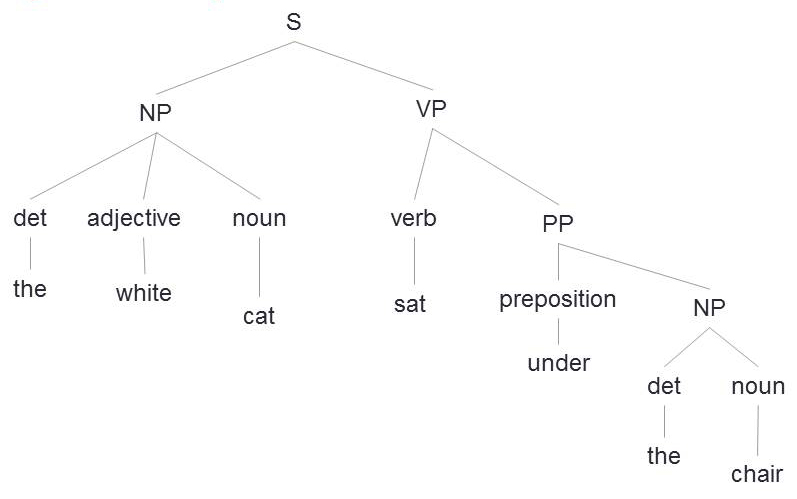

In [23]:
Image(PATH + 'tree.jpg')

Each word has a specific role in a sentence (Verb, Noun etc.) Parts-of-speech tagging (POS) is a feature extraction technique that attaches a tag to each word in the sentence, in order to provide a more precise context for further analysis. This is often a resource intensive process, but it can sometimes improve the accuracy or our models.

## In NLTK:

In [34]:
from nltk.tag import pos_tag
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pos_tag(tok.tokenize("today is a great day to learn nlp"))

[('today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('day', 'NN'),
 ('to', 'TO'),
 ('learn', 'VB'),
 ('nlp', 'NN')]

## What do these acronyms mean?

I had no idea...

[clues](https://sites.google.com/site/partofspeechhelp/home/nn_nnp)

## Exercise: Use NLTK to get the POS for spam or ham

In [36]:
tok = WordPunctTokenizer()
pos_tag(tok.tokenize(spam))

[('Hello', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('saw', 'VBD'),
 ('your', 'PRP$'),
 ('contact', 'JJ'),
 ('information', 'NN'),
 ('on', 'IN'),
 ('LinkedIn', 'NNP'),
 ('.', '.'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('carefully', 'RB'),
 ('read', 'VBN'),
 ('through', 'IN'),
 ('your', 'PRP$'),
 ('profile', 'NN'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('seem', 'VBP'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('an', 'DT'),
 ('outstanding', 'JJ'),
 ('personality', 'NN'),
 ('.', '.'),
 ('This', 'DT'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('major', 'JJ'),
 ('reason', 'NN'),
 ('why', 'WRB'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('in', 'IN'),
 ('contact', 'NN'),
 ('with', 'IN'),
 ('you', 'PRP'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('Mr', 'NNP'),
 ('.', '.'),
 ('Valery', 'NNP'),
 ('Grayfer', 'NNP'),
 ('Chairman', 'NNP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Board', 'NNP'),
 ('of', 'IN'),
 ('Directors', 'NNP'),
 ('of', 'IN'),
 ('PJSC', 'NNP'),
 ('"', 'NNP'),
 ('LUKOIL', 'NNP'),
 ('".', 'NNP'),
 (

## Question: Suppose now we wanted to match documents to search terms using only the words on the page. How could we match a search phrase like 'kittens' to the best document for that term?

## Term frequency - Inverse document frequency

If a word is rare across all documents, but frequent in a given document, we can say that that document
is likely to be highly relevant to that subject.

Let's see how it is calculated.

Term frequency tf is the frequency of a certain term in a document:
$$
\mathrm{tf}(t,d) = \frac{N_\text{term}}{N_\text{terms in Document}}
$$
Inverse document frequency is defined as the frequency of documents that contain that term over the whole corpus.
$$
\mathrm{idf}(t, D) = \log\frac{N_\text{Documents}}{N_\text{Documents that contain term}}
$$

Term frequency - Inverse Document Frequency is calculated as:

$$
\mathrm{tfidf}(t,d,D) = \mathrm{tf}(t,d) \cdot \mathrm{idf}(t, D)
$$

This enhances terms that are highly specific of a particular document, while suppressing terms that are common to most documents.


## Scikit Learn has a TF-IDF vectorizer that works similarly to the other vectorizers we used previously. Notice that now we can also eliminate stop words to improve our analysis.

## Exercise:<br><br> As you did above, import and initialize the TfidfVectorizer, then fit the spam and ham data. 

## Answer:

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
cvec = TfidfVectorizer(stop_words='english')
cvec.fit([spam,ham])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## Now we can see the values

In [27]:
df  = pd.DataFrame(cvec.transform([spam]).todense(),
             columns=cvec.get_feature_names())

df.transpose().sort_values(0, ascending=False).head(15).transpose()

,euros,contact,years,personality,linkedin,lukoil,major,million,old,operation,outstanding,pjsc,later,profile,read
0,0.296357,0.296357,0.210861,0.148179,0.148179,0.148179,0.148179,0.148179,0.148179,0.148179,0.148179,0.148179,0.148179,0.148179,0.148179


In [28]:
cvec.fit([ham])
df  = pd.DataFrame(cvec.transform([ham]).todense(),
             columns=cvec.get_feature_names())

df.transpose().sort_values(0, ascending=False).head(15).transpose()

,scientist,data,regards,interview,round,mr,passed,pleased,position,application,location,senior,site,smith,time
0,0.301511,0.301511,0.301511,0.301511,0.150756,0.150756,0.150756,0.150756,0.150756,0.150756,0.150756,0.150756,0.150756,0.150756,0.150756


## Question: What is TF-IDF? Describe to a partner with your own words.

## Conclusion

In this lesson we learned about Natural Language Processing and about two very powerful toolkits:
- Scikit Learn Feature Extraction for Text
- Natural Language Tool Kit

And we learned several techniques for working with language-based data:
- Sentence segmentation
- Stop word removal
- Stemming
- POS tagging
- Tf-Idf

### ADDITIONAL RESOURCES

- [Count Vectorizer Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [Choosing a Stemmer](https://www.elastic.co/guide/en/elasticsearch/guide/current/choosing-a-stemmer.html)
- [Feature Hashing](https://en.wikipedia.org/wiki/Feature_hashing)
- [Term Frequency Inverse Document Frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
- [TFIDF Vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)